## Before interventions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

# Load the data from the provided CSV files
data_path_1405 = "/Users/nicolaigarderhansen/Downloads/data_1405.csv"
data_path_1441 = "/Users/nicolaigarderhansen/Downloads/data_1441.csv"

# Read the CSV files
data_1405 = pd.read_csv(data_path_1405)
data_1441 = pd.read_csv(data_path_1441)

# Drop the first column from both datasets
data_1405 = data_1405.drop(data_1405.columns[0], axis=1)
data_1441 = data_1441.drop(data_1441.columns[0], axis=1)

# Concatenate the dataframes to create a combined dataframe
combined_data = pd.concat([data_1405, data_1441], ignore_index=True)

# Display the first few rows of the combined data
combined_data.head(20)

/var/folders/rg/5qwcvj1934v3254xfppzsxm80000gn/T/ipykernel_62285/1935963157.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,A,B,C,D,E,F
0,1.106121,-0.249361,2.132641,-0.234746,-1.131461,2.684782
1,-0.657706,0.684848,2.985844,-0.468942,-0.953434,1.980658
2,2.765838,-0.659634,0.204052,1.380357,0.703785,1.474289
3,-0.959712,0.826713,0.769230,0.014360,-0.155586,2.230990
4,7.289395,-0.698683,2.826336,-1.432489,0.694814,2.186347
5,-0.014316,1.387943,2.920839,1.126754,0.983820,2.780545
6,-0.883565,2.121989,1.871171,1.000854,1.528901,3.319101
7,-0.668283,0.847002,1.184576,0.559000,-0.774801,2.070352
8,-0.052388,1.192260,2.298483,0.126286,-0.561798,1.905793
9,-1.155853,-0.262324,1.601277,1.044660,0.878278,3.530376


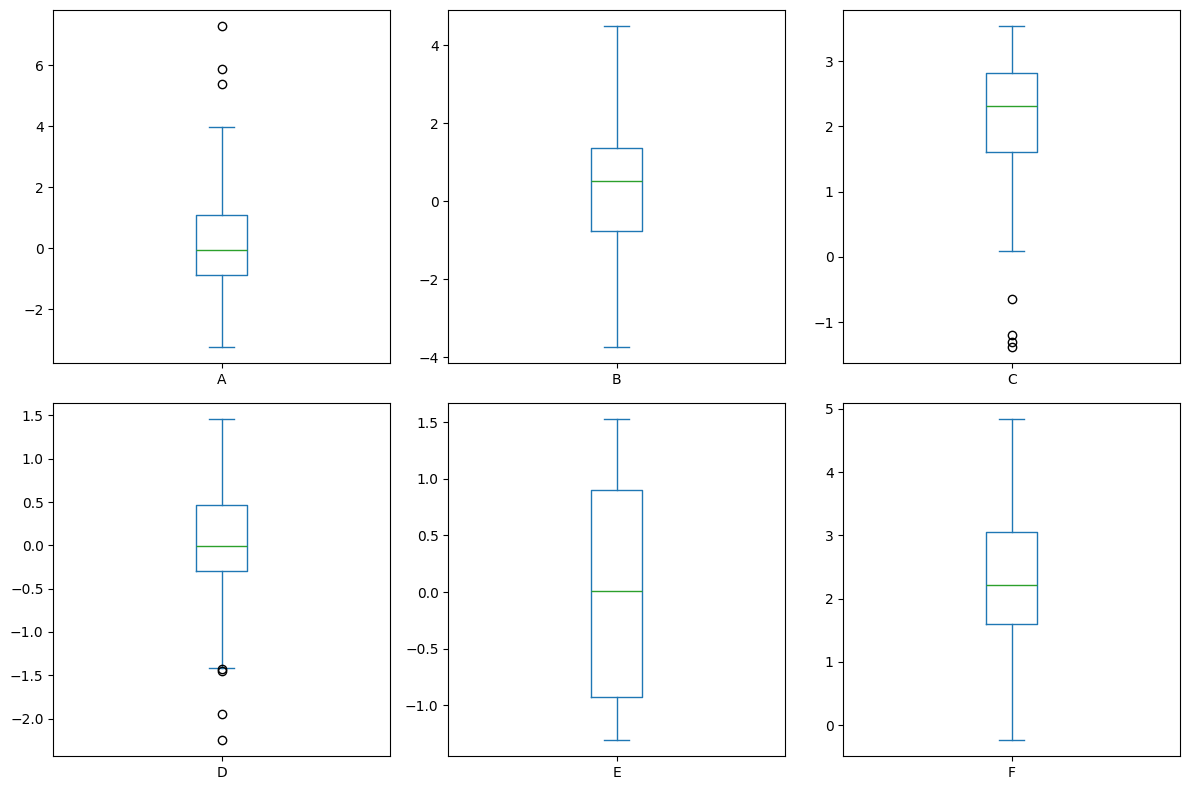

In [2]:
# Create a boxplot for each variable in the DataFrame
combined_data.plot(kind='box', subplots=True, layout=(math.ceil(combined_data.shape[1] / 3), 3), figsize=(12, 8), sharex=False, sharey=False)

# Display the plot
plt.tight_layout()  # Ensures the plots are neatly spaced
plt.show()

In [3]:
# Recursive formula to calculate the number of DAGs with N nodes
# Initialize the array for storing results
N = 7
a = np.zeros(N + 1)

# We know that with 1 node, there is only 1 possible graph
a[1] = 1

# Calculate the number of DAGs for each number of nodes up to N
for n in range(2, N + 1):
    a[n] = sum(
        ((-1) ** (k - 1)) * (math.comb(n, k)) * (2 ** (k * (n - k))) * a[n - k] 
        for k in range(1, n + 1)
    )

a[7]  # The total number of possible DAGs with 7 nodes

1694113344.0

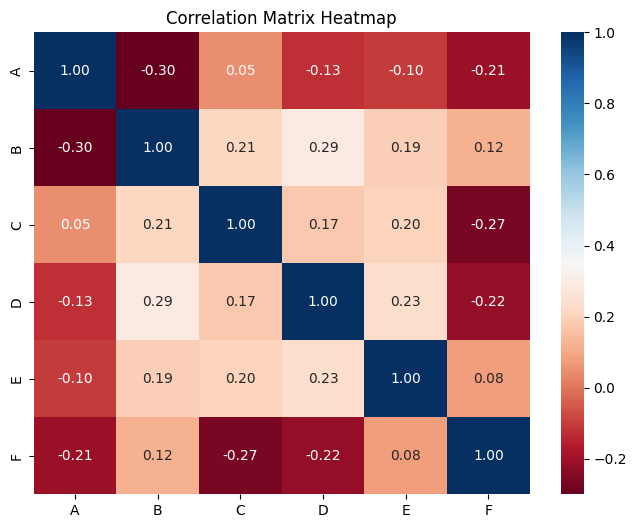

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for the data to find potential relationships
correlation_matrix = combined_data.corr() 

# Plot
plt.figure(figsize=(8, 6))
correlation_plot = sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

## Intervention: D = 2

In [5]:
# Load the data from the provided CSV file
intervention1_data_path = "/Users/nicolaigarderhansen/Downloads/data_1414.csv"
intervention1_data_extra_path = "/Users/nicolaigarderhansen/Downloads/data_1442.csv"

intervention1_data = pd.read_csv(intervention1_data_path)
intervention1_data_extra = pd.read_csv(intervention1_data_extra_path)

intervention1_data = intervention1_data.drop(intervention1_data.columns[0], axis=1)
intervention1_data_extra = intervention1_data_extra.drop(intervention1_data_extra.columns[0], axis=1)

intervention1_data = pd.concat([intervention1_data, intervention1_data_extra], ignore_index=True)

intervention1_data.head(25)

,A,B,C,D,E,F
0,0.767777,3.008841,0.015452,2.0,1.386645,3.690150
1,4.562961,-1.219463,-0.007062,2.0,1.047448,1.439642
2,3.126612,0.585549,1.394880,2.0,0.897121,1.425671
3,5.170593,0.685098,3.398365,2.0,-0.997622,0.666331
4,6.512464,3.067137,3.325286,2.0,0.065228,0.483526
5,1.849764,-1.732017,1.292265,2.0,-1.159806,2.459431
6,0.816931,0.084890,1.841669,2.0,-1.235672,3.328487
7,4.665198,-0.517322,0.037271,2.0,0.863395,1.516861
8,0.702641,0.028763,1.605359,2.0,-1.325011,3.428155
9,1.834382,-3.754344,2.745814,2.0,0.760006,2.316567


In [6]:
# List of target variables
target_variables = ["A", "B", "C", "D", "E", "F"]

# Calculate means for before intervention
before_intervention_means = combined_data[target_variables].mean()

# Calculate means for after intervention
after_intervention_means = intervention1_data[target_variables].mean()

# Calculate the difference in means
mean_differences = after_intervention_means - before_intervention_means

# Display the difference in means
print("\nDifference in Means:")
print(mean_differences)


Difference in Means:
A    3.194274
B   -0.935092
C   -0.455960
D    2.031445
E    0.029850
F   -0.386580
dtype: float64


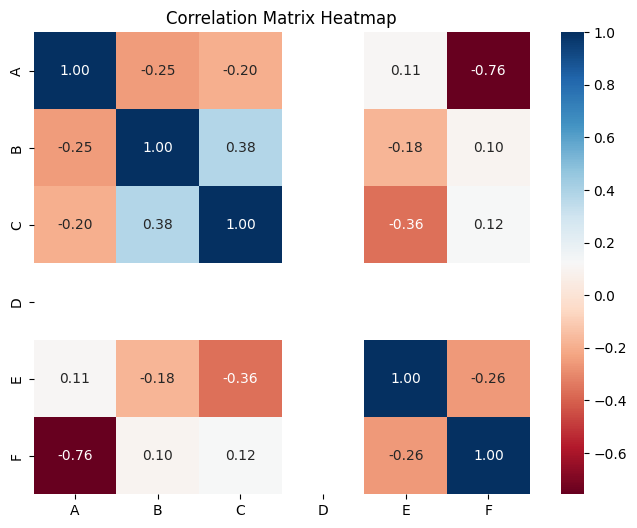

In [7]:
# Calculate the correlation matrix for the data to find potential relationships
correlation_matrix1 = intervention1_data.corr() 

# Plot
plt.figure(figsize=(8, 6))
correlation_plot1 = sns.heatmap(correlation_matrix1, annot=True, cmap='RdBu', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

In [8]:
from scipy import stats
import pandas as pd

# Assuming data is the original dataset and intervention1_data is the dataset after the intervention

# List of variables to test
variables = ['A', 'B', 'C', 'E', 'F']

# Significance level
alpha = 0.05

for var in variables:
    # Extract the specific variable to test
    before_intervention = combined_data.head(25)[var]
    after_intervention = intervention1_data[var]

    # Perform a paired samples t-test
    t_stat, p_value_t = stats.ttest_rel(before_intervention, after_intervention)

    # Calculate the variances for the F-test
    var_before = before_intervention.var()
    var_after = after_intervention.var()

    # Perform an F-test to compare variances
    f_stat = var_before / var_after
    df1 = len(before_intervention) - 1  # degrees of freedom for the first group
    df2 = len(after_intervention) - 1  # degrees of freedom for the second group

    # Calculate the p-value for the F-test
    p_value_f = stats.f.cdf(f_stat, df1, df2)

    # Only print results if there is a significant difference
    if p_value_t < alpha or p_value_f < alpha:
        print(f"Variable: {var}")

        # Check for significant difference in means
        if p_value_t < alpha:
            print("Paired t-test:")
            print("  T-statistic:", t_stat)
            print("  P-value:", p_value_t)
            print("  Reject the null hypothesis - significant difference in means.")

        # Check for significant difference in variances
        if p_value_f < alpha:
            print("F-test for variances:")
            print("  F-statistic:", f_stat)
            print("  P-value:", p_value_f)
            print("  Reject the null hypothesis - significant difference in variances.")

        print("\n")  # Add a newline for better readability between tests

Variable: A
Paired t-test:
  T-statistic: -6.0092269213032345
  P-value: 3.3308848549068196e-06
  Reject the null hypothesis - significant difference in means.


Variable: B
Paired t-test:
  T-statistic: 2.602100451893111
  P-value: 0.01563002132379853
  Reject the null hypothesis - significant difference in means.
F-test for variances:
  F-statistic: 0.4377382650968738
  P-value: 0.024105573271495824
  Reject the null hypothesis - significant difference in variances.




/var/folders/rg/5qwcvj1934v3254xfppzsxm80000gn/T/ipykernel_62285/1473256056.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_first10["Intervention"] = "Before"
/var/folders/rg/5qwcvj1934v3254xfppzsxm80000gn/T/ipykernel_62285/1473256056.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intervention1_data_first10["Intervention"] = "After"


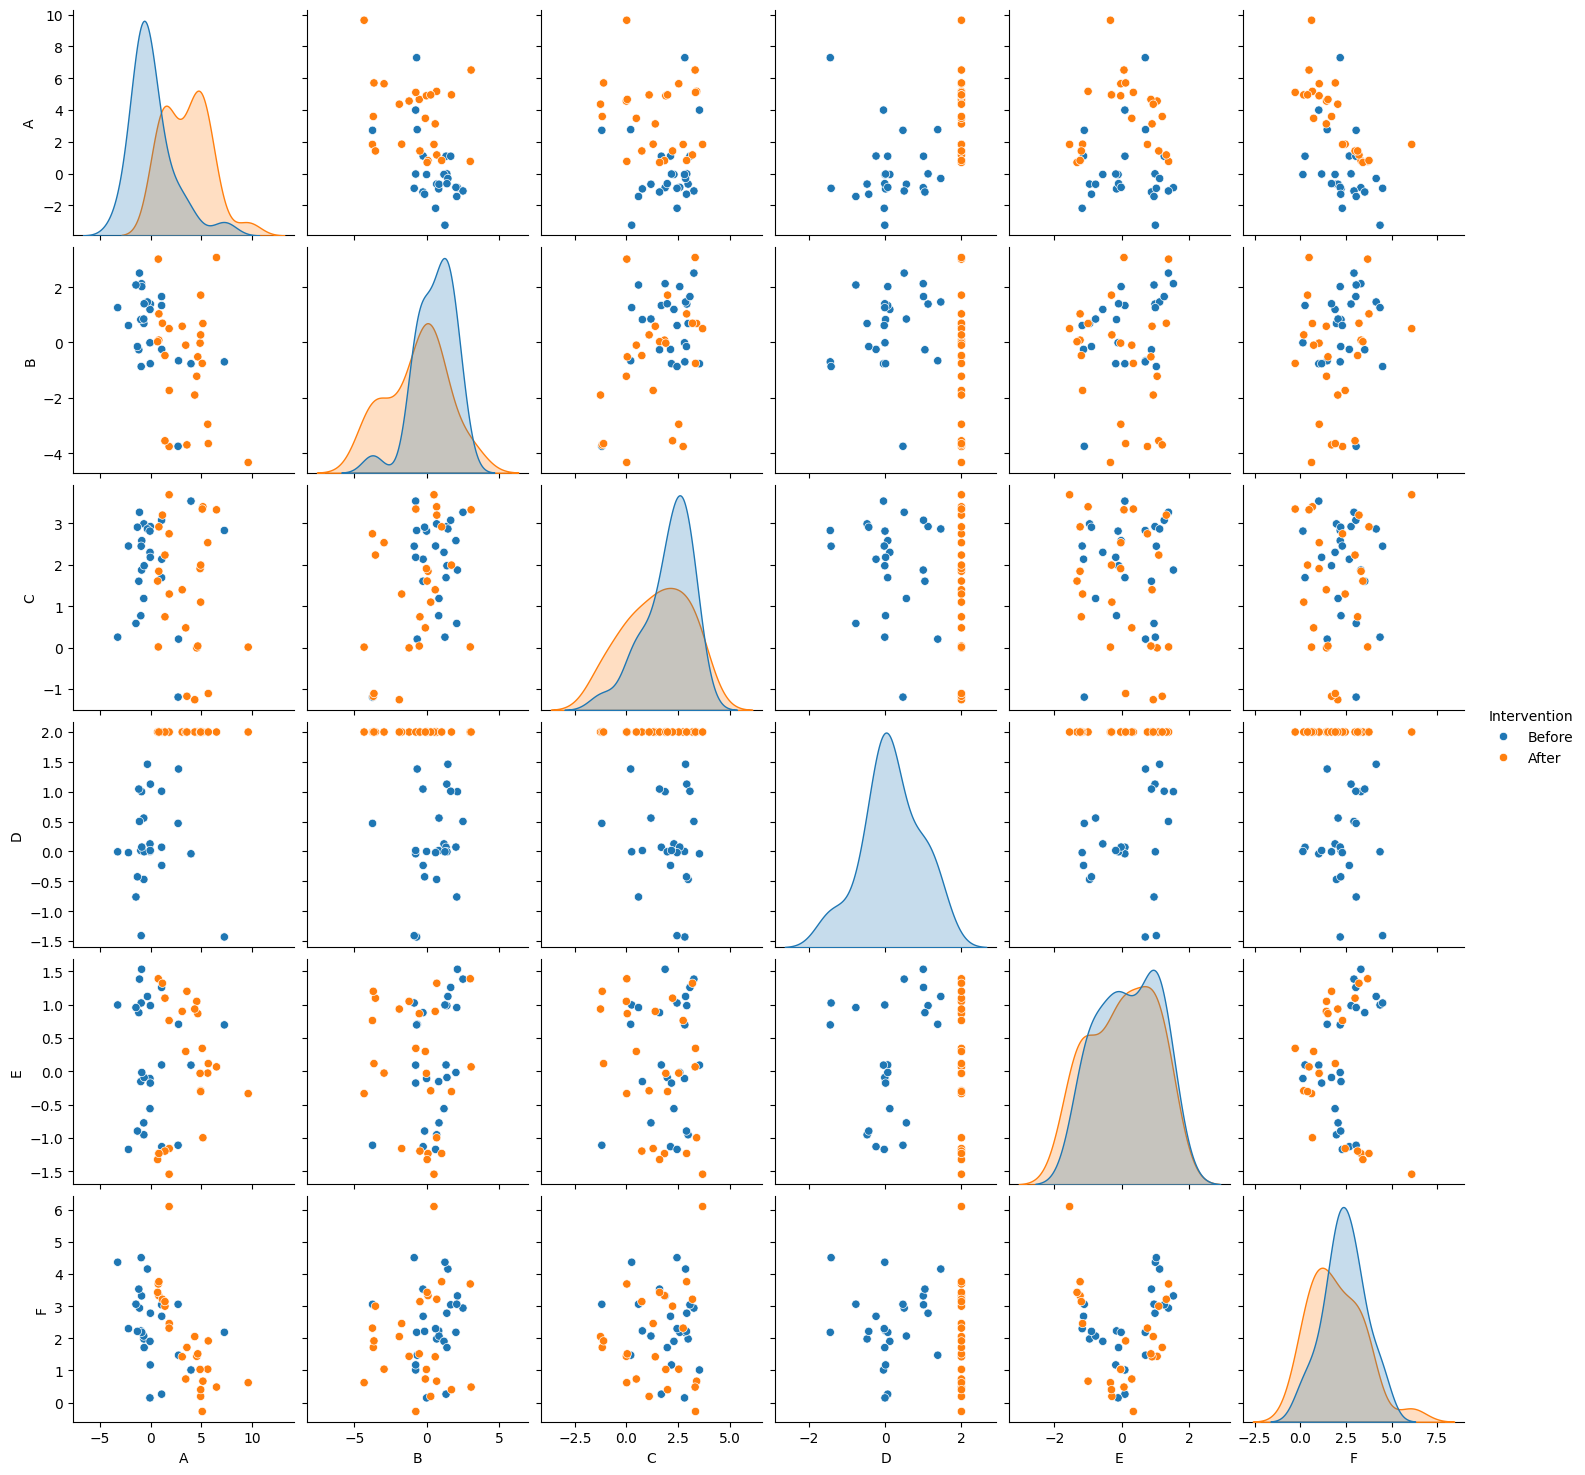

In [9]:
# Select the first 10 rows from each dataset
data_first10 = combined_data.head(25)
intervention1_data_first10 = intervention1_data.head(25)

# Create a column to indicate the source of the data ("Before" or "After")
data_first10["Intervention"] = "Before"
intervention1_data_first10["Intervention"] = "After"

# Combine the data into a single DataFrame
pairplot_data = pd.concat([data_first10, intervention1_data_first10])

# Create a pairplot with 'Intervention' as the hue to distinguish the two datasets
sns.pairplot(pairplot_data, hue="Intervention")

# Display the pairplot
plt.show()

## Intervention A = -2

In [10]:
# Load the data from the provided CSV file
intervention2_data_path = "/Users/nicolaigarderhansen/Downloads/data_1416.csv"
intervention2_data_extra_path = "/Users/nicolaigarderhansen/Downloads/data_1443.csv"

intervention2_data = pd.read_csv(intervention2_data_path)
intervention2_data_extra = pd.read_csv(intervention2_data_extra_path)

intervention2_data = intervention2_data.drop(intervention2_data.columns[0], axis=1)
intervention2_data_extra = intervention2_data_extra.drop(intervention2_data_extra.columns[0], axis=1)

intervention2_data = pd.concat([intervention2_data, intervention2_data_extra], ignore_index=True)

intervention2_data.head(25)

,A,B,C,D,E,F
0,-2.0,1.836480,2.176107,0.718171,-1.151473,4.638052
1,-2.0,0.544756,2.984250,0.373249,0.513503,0.522921
2,-2.0,-1.325573,-0.226340,-0.065752,-0.892575,1.779793
3,-2.0,-1.463094,0.644121,0.970195,-0.888213,2.811785
4,-2.0,2.209953,3.125989,0.000046,-0.098261,0.990431
5,-2.0,1.714398,3.137418,1.521962,-1.039529,3.081248
6,-2.0,1.086566,2.066409,-1.111184,1.198977,2.015267
7,-2.0,0.623080,3.079775,-0.779080,-0.964182,0.738937
8,-2.0,0.893335,3.455446,0.519045,0.981430,2.662655
9,-2.0,5.986381,3.398536,0.789614,-0.777238,1.078869


In [11]:
# List of target variables
target_variables = ["A", "B", "C", "D", "E", "F"]

# Calculate means for before intervention
before_intervention_means = combined_data[target_variables].mean()

# Calculate means for after intervention
after_intervention_means = intervention2_data[target_variables].mean()

# Calculate the difference in means
mean_differences = after_intervention_means - before_intervention_means

# Display the difference in means
print("\nDifference in Means:")
print(mean_differences)


Difference in Means:
A   -2.366737
B    0.959070
C    0.543323
D    0.165812
E   -0.235749
F   -0.633178
dtype: float64


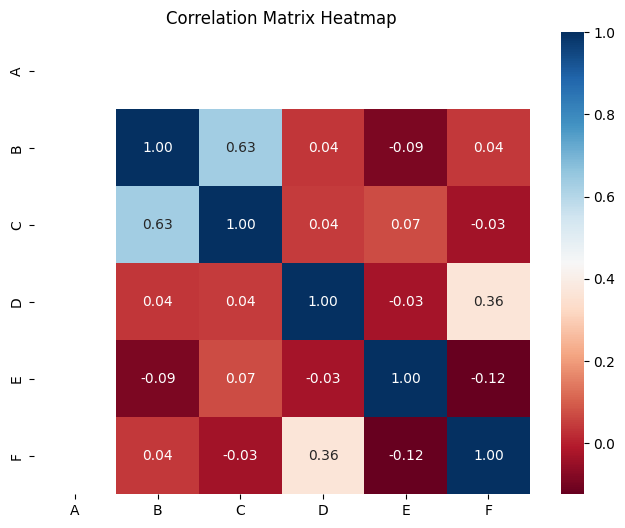

In [12]:
# Calculate the correlation matrix for the data to find potential relationships
correlation_matrix2 = intervention2_data.corr() 

# Plot
plt.figure(figsize=(8, 6))
correlation_plot2 = sns.heatmap(correlation_matrix2, annot=True, cmap='RdBu', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

/var/folders/rg/5qwcvj1934v3254xfppzsxm80000gn/T/ipykernel_62285/254295886.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_first10["Intervention"] = "Before"
/var/folders/rg/5qwcvj1934v3254xfppzsxm80000gn/T/ipykernel_62285/254295886.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intervention2_data_first10["Intervention"] = "After"


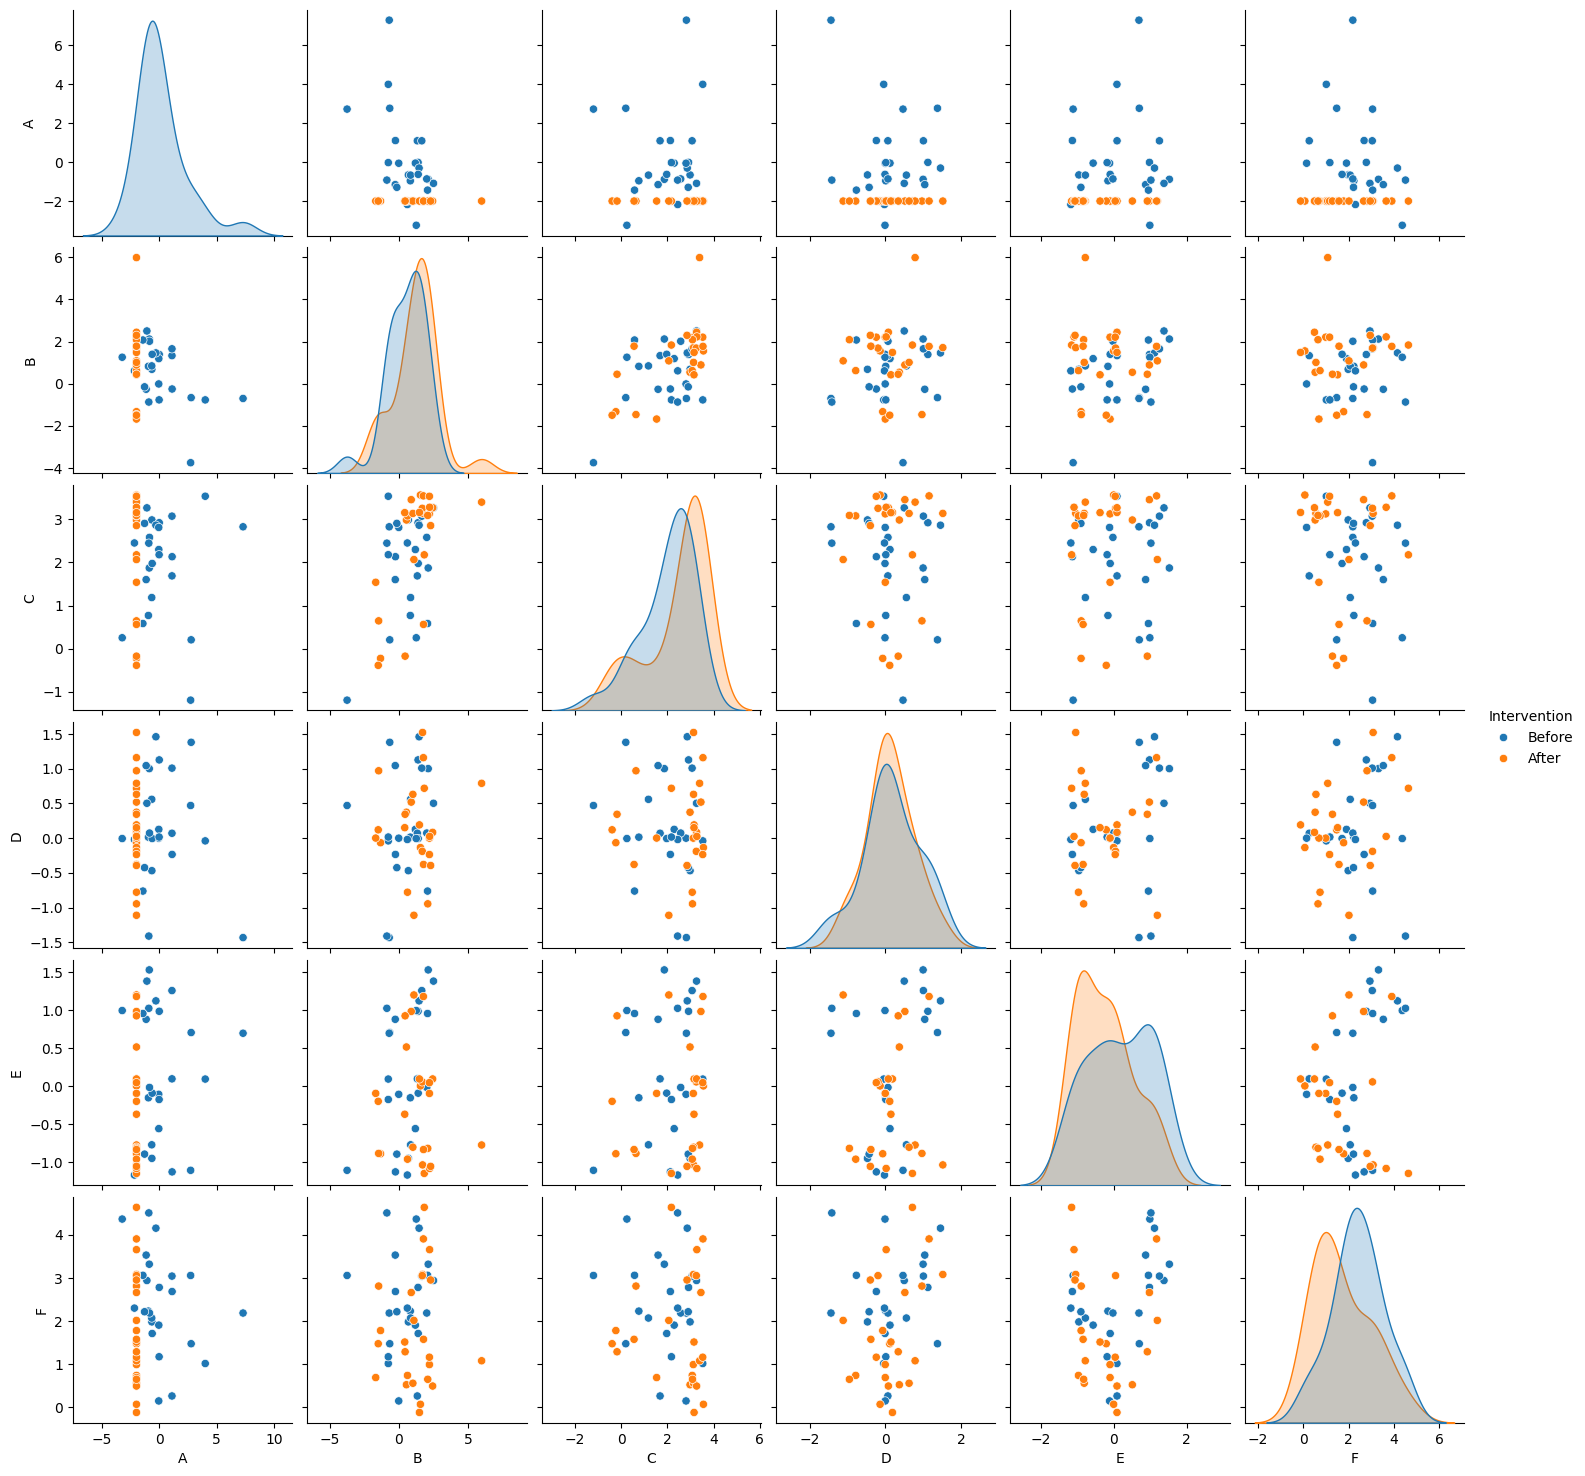

In [13]:
# Select the first 10 rows from each dataset
data_first10 = combined_data.head(25)
intervention2_data_first10 = intervention2_data.head(25)

# Create a column to indicate the source of the data ("Before" or "After")
data_first10["Intervention"] = "Before"
intervention2_data_first10["Intervention"] = "After"

# Combine the data into a single DataFrame
pairplot_data = pd.concat([data_first10, intervention2_data_first10])

# Create a pairplot with 'Intervention' as the hue to distinguish the two datasets
sns.pairplot(pairplot_data, hue="Intervention")

# Display the pairplot
plt.show()

In [14]:
from scipy import stats
import pandas as pd

# Assuming data is the original dataset and intervention1_data is the dataset after the intervention

# List of variables to test
variables = ['B', 'C', 'D', 'E', 'F']

# Significance level
alpha = 0.05

for var in variables:
    # Extract the specific variable to test
    before_intervention = combined_data.head(25)[var]
    after_intervention = intervention2_data[var]

    # Perform a paired samples t-test
    t_stat, p_value_t = stats.ttest_rel(before_intervention, after_intervention)

    # Calculate the variances for the F-test
    var_before = before_intervention.var()
    var_after = after_intervention.var()

    # Perform an F-test to compare variances
    f_stat = var_before / var_after
    df1 = len(before_intervention) - 1  # degrees of freedom for the first group
    df2 = len(after_intervention) - 1  # degrees of freedom for the second group

    # Calculate the p-value for the F-test
    p_value_f = stats.f.cdf(f_stat, df1, df2)

    # Only print results if there is a significant difference
    if p_value_t < alpha or p_value_f < alpha:
        print(f"Variable: {var}")

        # Check for significant difference in means
        if p_value_t < alpha:
            print("Paired t-test:")
            print("  T-statistic:", t_stat)
            print("  P-value:", p_value_t)
            print("  Reject the null hypothesis - significant difference in means.")

        # Check for significant difference in variances
        if p_value_f < alpha:
            print("F-test for variances:")
            print("  F-statistic:", f_stat)
            print("  P-value:", p_value_f)
            print("  Reject the null hypothesis - significant difference in variances.")

        print("\n")  # Add a newline for better readability between tests

## Intervention: F = -2

In [15]:
# Load the data from the provided CSV file
intervention3_data_path = "/Users/nicolaigarderhansen/Downloads/data_1417.csv"
intervention3_data_extra_path = "/Users/nicolaigarderhansen/Downloads/data_1444.csv"

intervention3_data = pd.read_csv(intervention3_data_path)
intervention3_data_extra = pd.read_csv(intervention3_data_extra_path)

intervention3_data = intervention3_data.drop(intervention3_data.columns[0], axis=1)
intervention3_data_extra = intervention3_data_extra.drop(intervention3_data_extra.columns[0], axis=1)

intervention3_data = pd.concat([intervention3_data, intervention3_data_extra], ignore_index=True)

intervention3_data.head(25)

,A,B,C,D,E,F
0,7.786808,-3.514821,-1.517819,-1.651573,0.916532,-2.0
1,5.903690,-0.791208,1.502400,0.151132,0.144446,-2.0
2,3.452096,-1.397352,-0.541683,0.687164,-1.109663,-2.0
3,5.816413,-0.392765,1.821539,0.203099,0.708220,-2.0
4,5.726158,-0.544951,0.528510,-1.093244,1.018755,-2.0
5,4.049534,-1.830651,2.424868,0.341953,0.784479,-2.0
6,10.382335,-0.838748,2.325647,1.536094,-1.093489,-2.0
7,4.995131,-0.526487,2.515296,1.006882,0.761687,-2.0
8,5.433012,-0.471189,3.425546,-1.191308,-0.706490,-2.0
9,5.222069,-2.373740,3.661694,1.126295,0.994709,-2.0


In [16]:
# List of target variables
target_variables = ["A", "B", "C", "D", "E", "F"]

# Calculate means for before intervention
before_intervention_means = combined_data[target_variables].mean()

# Calculate means for after intervention
after_intervention_means = intervention2_data[target_variables].mean()

# Calculate the difference in means
mean_differences = after_intervention_means - before_intervention_means

# Display the difference in means
print("\nDifference in Means:")
print(mean_differences)


Difference in Means:
A   -2.366737
B    0.959070
C    0.543323
D    0.165812
E   -0.235749
F   -0.633178
dtype: float64


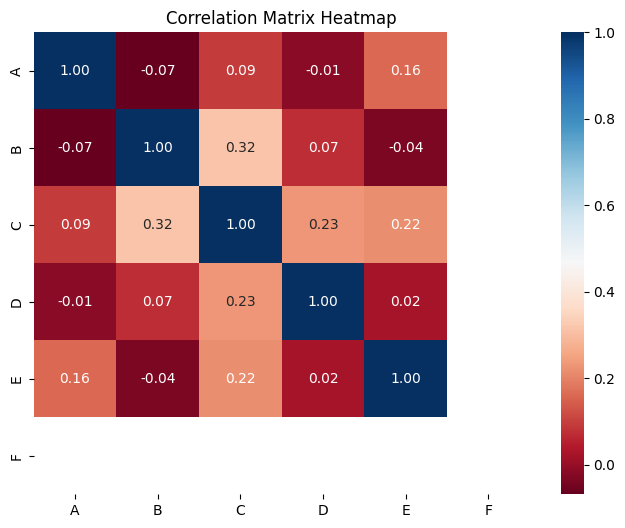

In [17]:
# Calculate the correlation matrix for the data to find potential relationships
correlation_matrix3 = intervention3_data.corr() 

# Plot
plt.figure(figsize=(8, 6))
correlation_plot3 = sns.heatmap(correlation_matrix3, annot=True, cmap='RdBu', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

/var/folders/rg/5qwcvj1934v3254xfppzsxm80000gn/T/ipykernel_62285/89984921.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_first10["Intervention"] = "Before"
/var/folders/rg/5qwcvj1934v3254xfppzsxm80000gn/T/ipykernel_62285/89984921.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intervention3_data_first10["Intervention"] = "After"


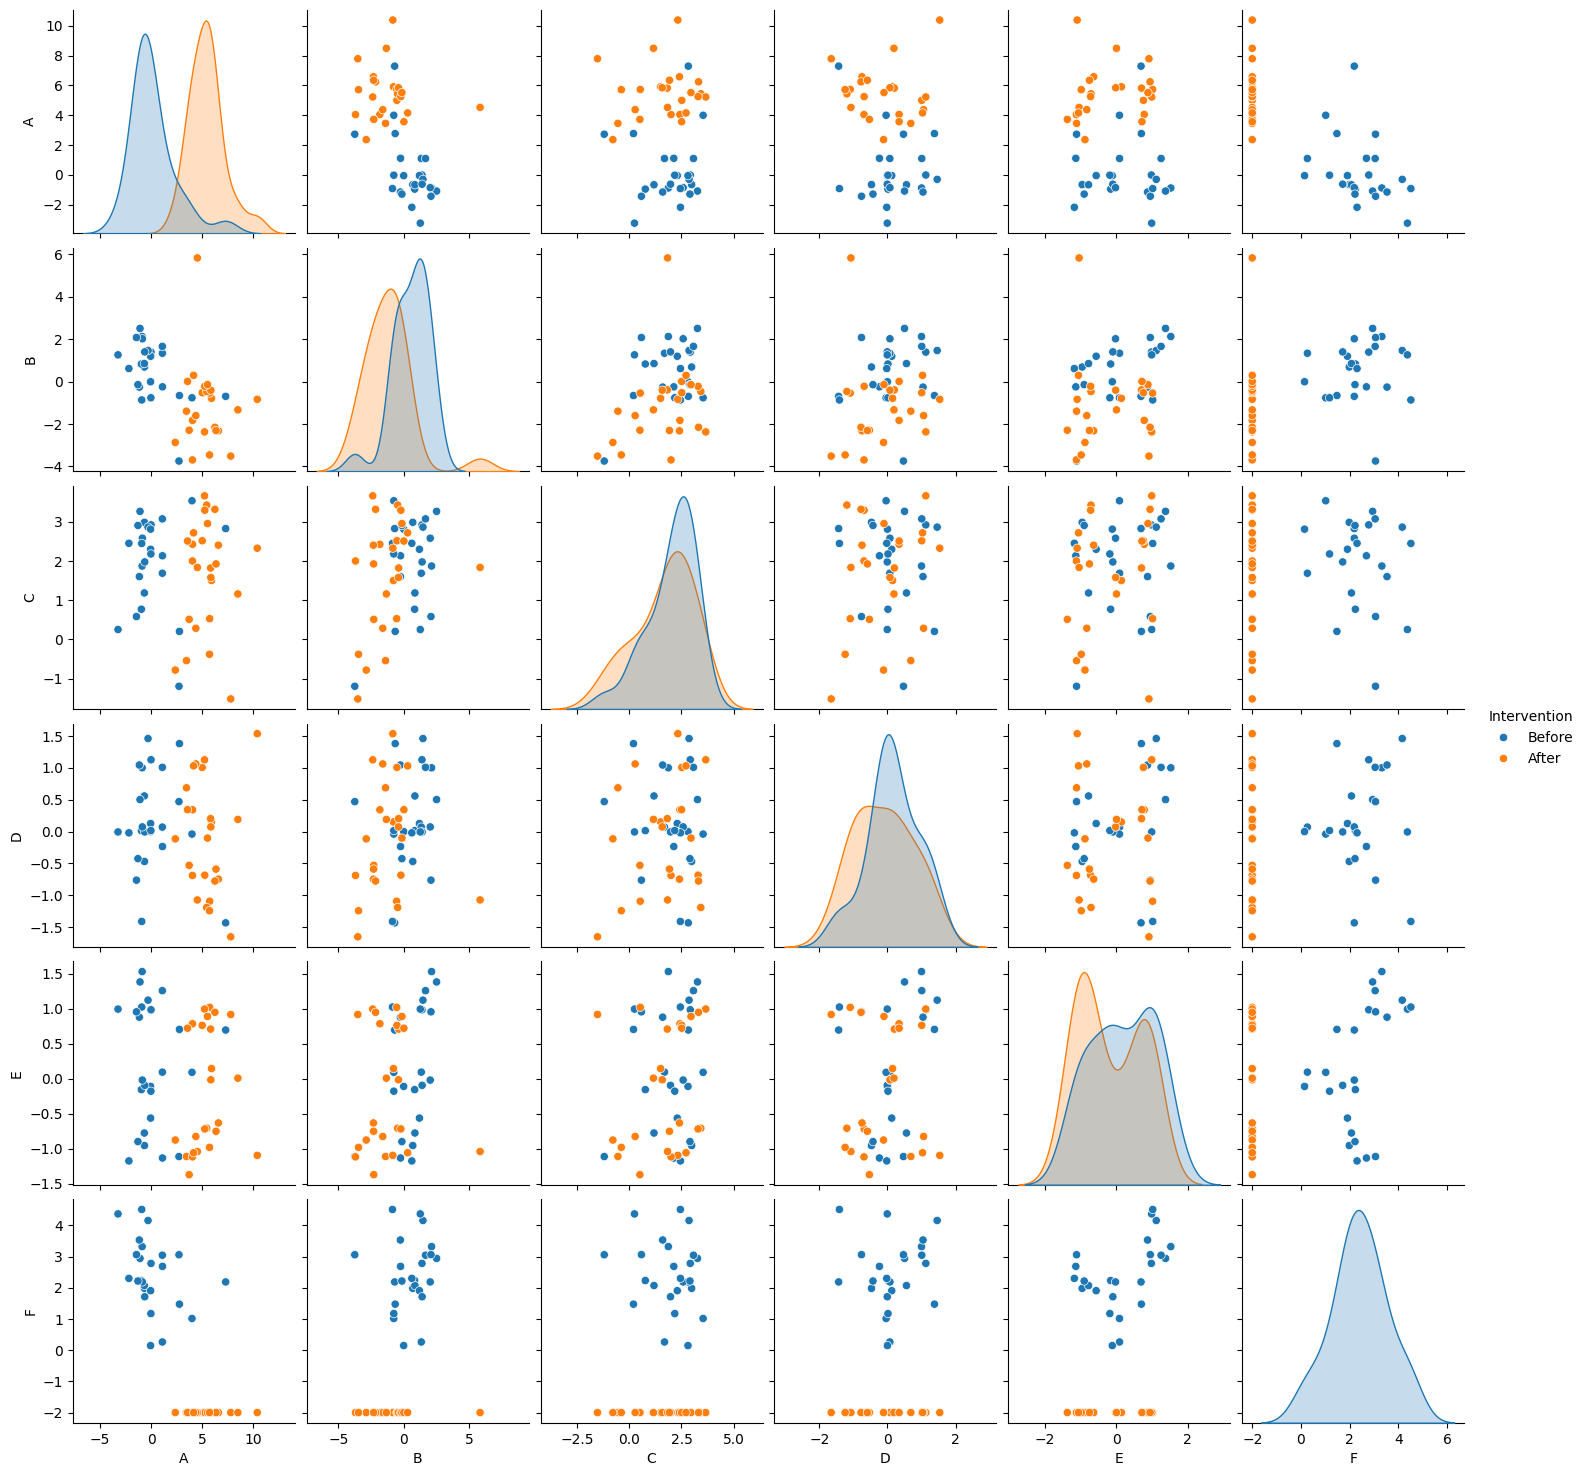

In [18]:
# Select the first 10 rows from each dataset
data_first10 = combined_data.head(25)
intervention3_data_first10 = intervention3_data.head(25)

# Create a column to indicate the source of the data ("Before" or "After")
data_first10["Intervention"] = "Before"
intervention3_data_first10["Intervention"] = "After"

# Combine the data into a single DataFrame
pairplot_data = pd.concat([data_first10, intervention3_data_first10])

# Create a pairplot with 'Intervention' as the hue to distinguish the two datasets
sns.pairplot(pairplot_data, hue="Intervention")

# Display the pairplot
plt.show()

In [19]:
from scipy import stats
import pandas as pd

# Assuming data is the original dataset and intervention1_data is the dataset after the intervention

# List of variables to test
variables = ['A', 'B', 'C', 'D', 'E']

# Significance level
alpha = 0.05

for var in variables:
    # Extract the specific variable to test
    before_intervention = combined_data.head(25)[var]
    after_intervention = intervention3_data[var]

    # Perform a paired samples t-test
    t_stat, p_value_t = stats.ttest_rel(before_intervention, after_intervention)

    # Calculate the variances for the F-test
    var_before = before_intervention.var()
    var_after = after_intervention.var()

    # Perform an F-test to compare variances
    f_stat = var_before / var_after
    df1 = len(before_intervention) - 1  # degrees of freedom for the first group
    df2 = len(after_intervention) - 1  # degrees of freedom for the second group

    # Calculate the p-value for the F-test
    p_value_f = stats.f.cdf(f_stat, df1, df2)

    # Only print results if there is a significant difference
    if p_value_t < alpha or p_value_f < alpha:
        print(f"Variable: {var}")

        # Check for significant difference in means
        if p_value_t < alpha:
            print("Paired t-test:")
            print("  T-statistic:", t_stat)
            print("  P-value:", p_value_t)
            print("  Reject the null hypothesis - significant difference in means.")

        # Check for significant difference in variances
        if p_value_f < alpha:
            print("F-test for variances:")
            print("  F-statistic:", f_stat)
            print("  P-value:", p_value_f)
            print("  Reject the null hypothesis - significant difference in variances.")

        print("\n")  # Add a newline for better readability between tests

Variable: A
Paired t-test:
  T-statistic: -9.092323469769148
  P-value: 3.0474622639387506e-09
  Reject the null hypothesis - significant difference in means.


Variable: B
Paired t-test:
  T-statistic: 4.72574231317552
  P-value: 8.340277766288077e-05
  Reject the null hypothesis - significant difference in means.




## Intervention: C = -2

In [20]:
# Load the data from the provided CSV file
intervention4_data_path = "/Users/nicolaigarderhansen/Downloads/data_1445.csv"

intervention4_data = pd.read_csv(intervention4_data_path)

intervention4_data = intervention4_data.drop(intervention4_data.columns[0], axis=1)

intervention4_data.head(25)

,A,B,C,D,E,F
0,1.926749,1.861683,-2.0,-1.424045,1.175160,3.615245
1,-0.912878,-1.369991,-2.0,0.171015,0.100843,1.864673
2,-1.458799,1.102612,-2.0,-0.238261,-1.140564,2.340090
3,1.618645,2.163229,-2.0,0.116211,-0.234846,1.250690
4,5.659717,0.130940,-2.0,-2.228398,-1.230437,2.024478
5,2.780301,-1.809488,-2.0,-0.241074,0.164113,-0.418371
6,0.737771,0.936074,-2.0,0.432002,-1.100681,3.052093
7,7.273395,3.730785,-2.0,-0.860824,1.085172,1.679463
8,2.889038,-0.984480,-2.0,-0.004910,-0.089538,0.352196
9,0.301492,0.661715,-2.0,-0.870273,-1.222942,3.282048


In [21]:
# List of target variables
target_variables = ["A", "B", "C", "D", "E", "F"]

# Calculate means for before intervention
before_intervention_means = combined_data[target_variables].mean()

# Calculate means for after intervention
after_intervention_means = intervention4_data[target_variables].mean()

# Calculate the difference in means
mean_differences = after_intervention_means - before_intervention_means

# Display the difference in means
print("\nDifference in Means:")
print(mean_differences)


Difference in Means:
A    0.115297
B    0.622744
C   -3.905443
D   -0.022170
E   -0.190489
F   -0.291232
dtype: float64


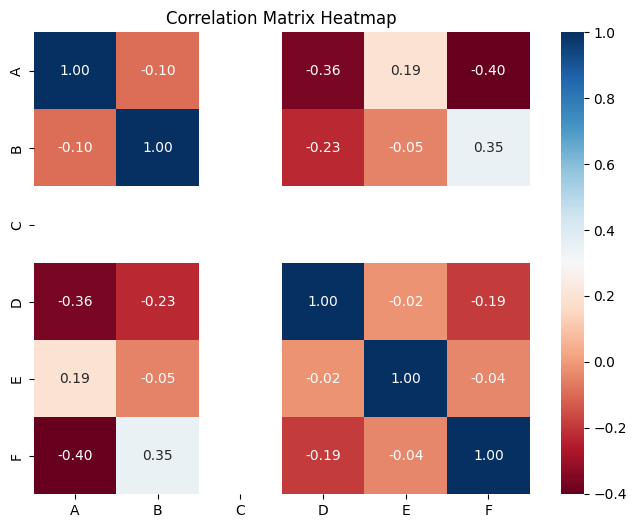

In [22]:
# Calculate the correlation matrix for the data to find potential relationships
correlation_matrix4 = intervention4_data.corr() 

# Plot
plt.figure(figsize=(8, 6))
correlation_plot4 = sns.heatmap(correlation_matrix4, annot=True, cmap='RdBu', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

/var/folders/rg/5qwcvj1934v3254xfppzsxm80000gn/T/ipykernel_62285/2273541610.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_first10["Intervention"] = "Before"
/var/folders/rg/5qwcvj1934v3254xfppzsxm80000gn/T/ipykernel_62285/2273541610.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intervention4_data_first10["Intervention"] = "After"


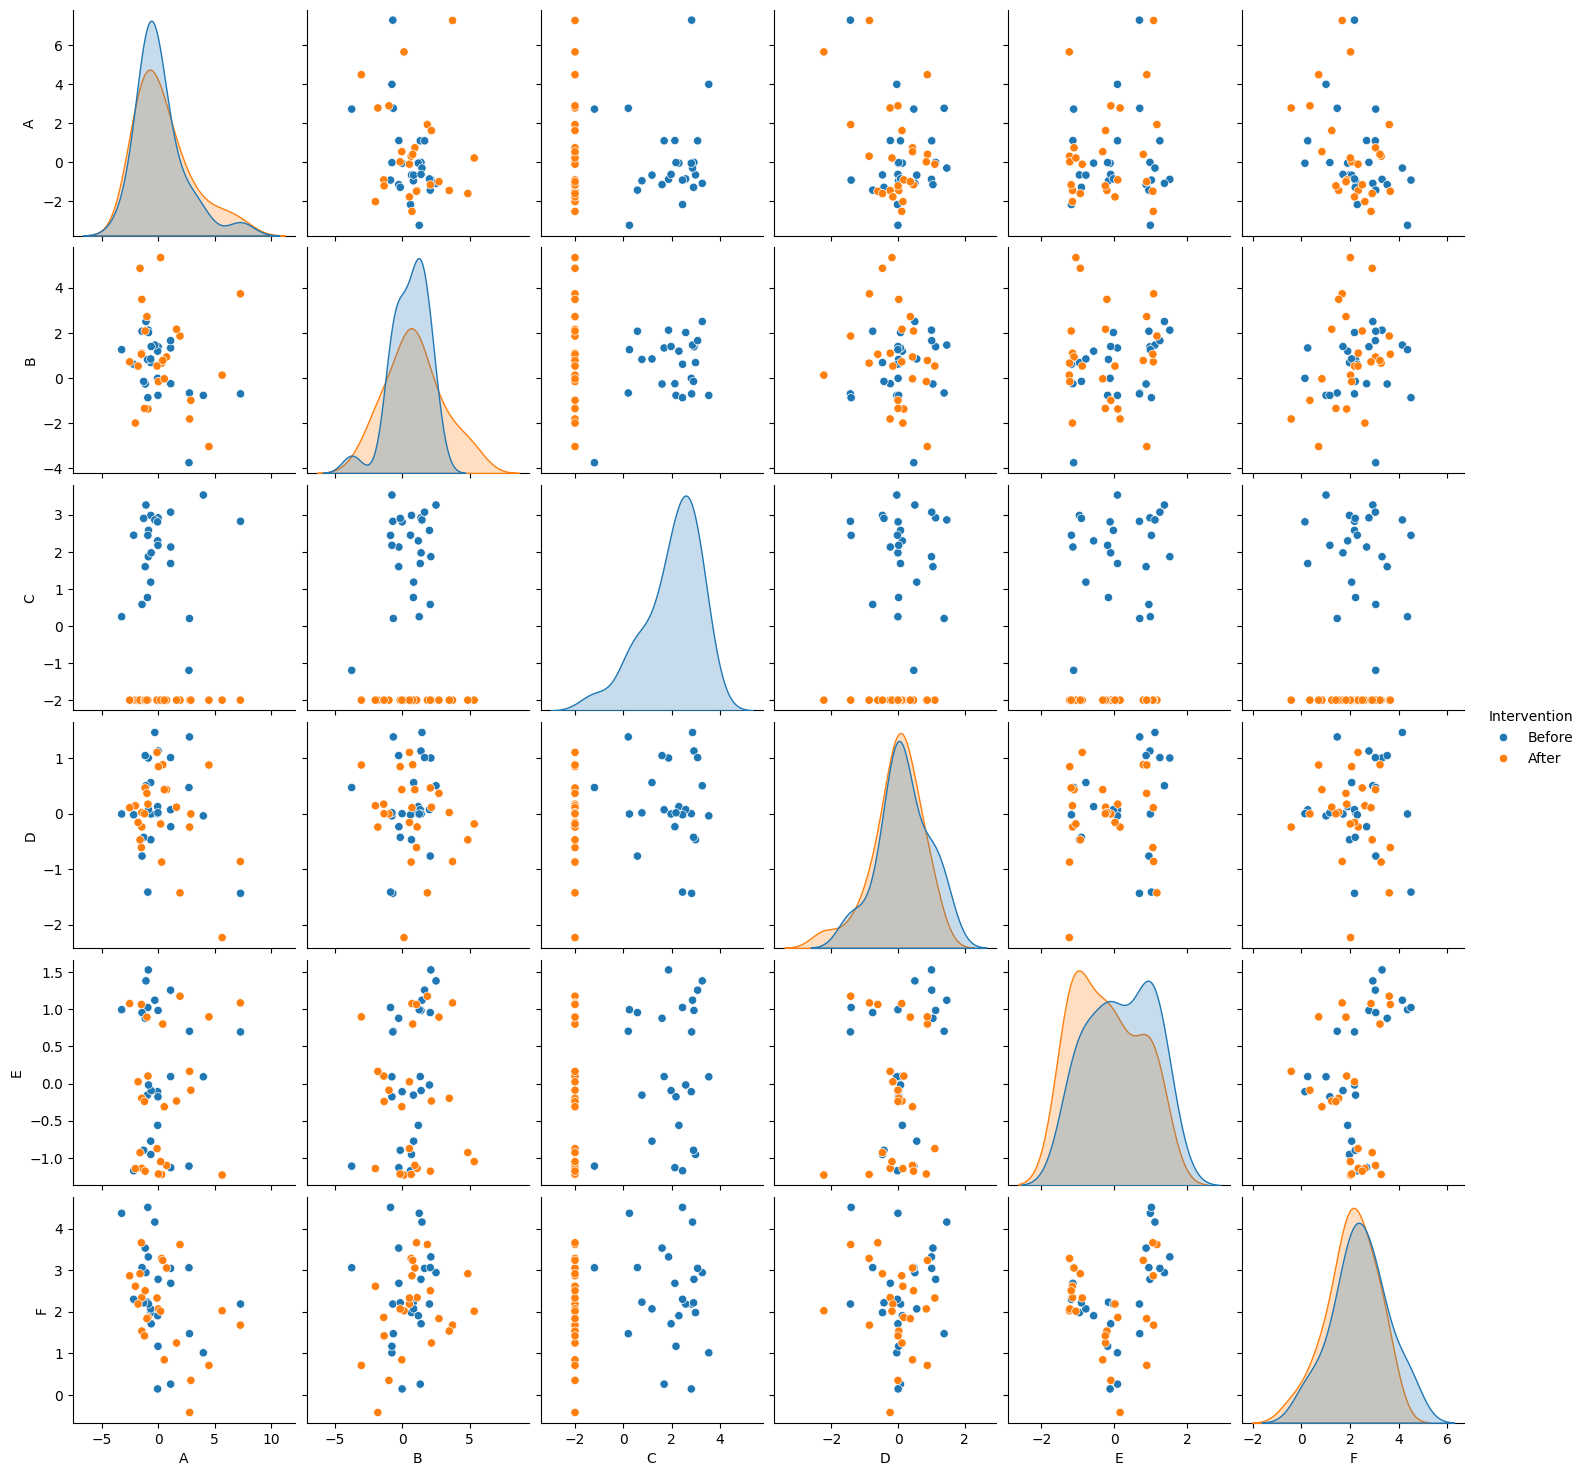

In [23]:
# Select the first 10 rows from each dataset
data_first10 = combined_data.head(25)
intervention4_data_first10 = intervention4_data.head(25)

# Create a column to indicate the source of the data ("Before" or "After")
data_first10["Intervention"] = "Before"
intervention4_data_first10["Intervention"] = "After"

# Combine the data into a single DataFrame
pairplot_data = pd.concat([data_first10, intervention4_data_first10])

# Create a pairplot with 'Intervention' as the hue to distinguish the two datasets
sns.pairplot(pairplot_data, hue="Intervention")

# Display the pairplot
plt.show()

In [24]:
from scipy import stats
import pandas as pd

# Assuming data is the original dataset and intervention1_data is the dataset after the intervention

# List of variables to test
variables = ['A', 'B', 'D', 'E', 'F']

# Significance level
alpha = 0.05

for var in variables:
    # Extract the specific variable to test
    before_intervention = combined_data.head(25)[var]
    after_intervention = intervention4_data[var]

    # Perform a paired samples t-test
    t_stat, p_value_t = stats.ttest_rel(before_intervention, after_intervention)

    # Calculate the variances for the F-test
    var_before = before_intervention.var()
    var_after = after_intervention.var()

    # Perform an F-test to compare variances
    f_stat = var_before / var_after
    df1 = len(before_intervention) - 1  # degrees of freedom for the first group
    df2 = len(after_intervention) - 1  # degrees of freedom for the second group

    # Calculate the p-value for the F-test
    p_value_f = stats.f.cdf(f_stat, df1, df2)

    # Only print results if there is a significant difference
    if p_value_t < alpha or p_value_f < alpha:
        print(f"Variable: {var}")

        # Check for significant difference in means
        if p_value_t < alpha:
            print("Paired t-test:")
            print("  T-statistic:", t_stat)
            print("  P-value:", p_value_t)
            print("  Reject the null hypothesis - significant difference in means.")

        # Check for significant difference in variances
        if p_value_f < alpha:
            print("F-test for variances:")
            print("  F-statistic:", f_stat)
            print("  P-value:", p_value_f)
            print("  Reject the null hypothesis - significant difference in variances.")

        print("\n")  # Add a newline for better readability between tests

Variable: B
F-test for variances:
  F-statistic: 0.42782474714646906
  P-value: 0.02124075472645558
  Reject the null hypothesis - significant difference in variances.




## Intervention: B = -2

In [25]:
# Load the data from the provided CSV file
intervention5_data_path = "/Users/nicolaigarderhansen/Downloads/data_1446.csv"

intervention5_data = pd.read_csv(intervention5_data_path)

intervention5_data = intervention5_data.drop(intervention5_data.columns[0], axis=1)

intervention5_data.head(25)

,A,B,C,D,E,F
0,-1.292280,-2.0,2.497489,0.259808,-0.977750,2.176768
1,4.170073,-2.0,-0.783998,0.552889,1.041108,1.809250
2,1.097556,-2.0,3.505395,0.084009,-0.843966,2.435284
3,1.146367,-2.0,1.520283,1.127683,-1.002541,1.935784
4,3.447888,-2.0,2.353997,1.620796,1.043158,2.938424
5,-2.188793,-2.0,2.158073,-0.504252,-1.065452,3.283258
6,1.686088,-2.0,3.831218,-0.692167,-1.070649,3.104964
7,-0.917981,-2.0,-1.108015,-0.681234,-1.079087,2.625532
8,-0.458599,-2.0,1.611755,0.846859,-1.043555,2.328066
9,7.751906,-2.0,1.411739,-1.169726,1.000543,-0.155305


In [26]:
# List of target variables
target_variables = ["A", "B", "C", "D", "E", "F"]

# Calculate means for before intervention
before_intervention_means = combined_data[target_variables].mean()

# Calculate means for after intervention
after_intervention_means = intervention5_data[target_variables].mean()

# Calculate the difference in means
mean_differences = after_intervention_means - before_intervention_means

# Display the difference in means
print("\nDifference in Means:")
print(mean_differences)


Difference in Means:
A    0.984822
B   -2.256216
C   -0.544356
D   -0.221763
E   -0.092552
F   -0.414344
dtype: float64


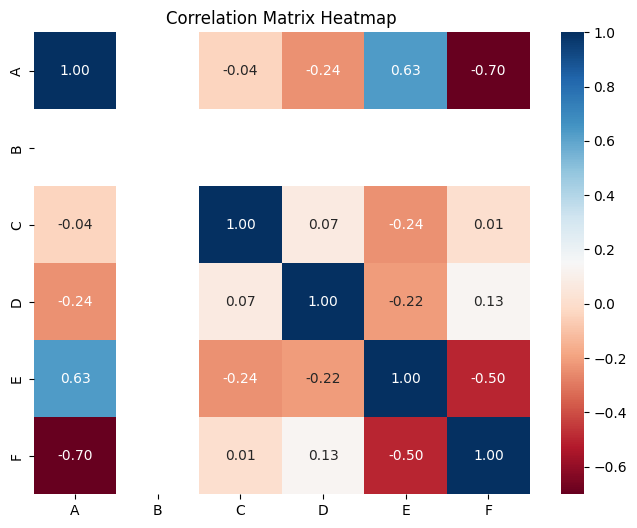

In [27]:
# Calculate the correlation matrix for the data to find potential relationships
correlation_matrix5 = intervention5_data.corr() 

# Plot
plt.figure(figsize=(8, 6))
correlation_plot4 = sns.heatmap(correlation_matrix5, annot=True, cmap='RdBu', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

/var/folders/rg/5qwcvj1934v3254xfppzsxm80000gn/T/ipykernel_62285/3109503730.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_first10["Intervention"] = "Before"
/var/folders/rg/5qwcvj1934v3254xfppzsxm80000gn/T/ipykernel_62285/3109503730.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intervention5_data_first10["Intervention"] = "After"


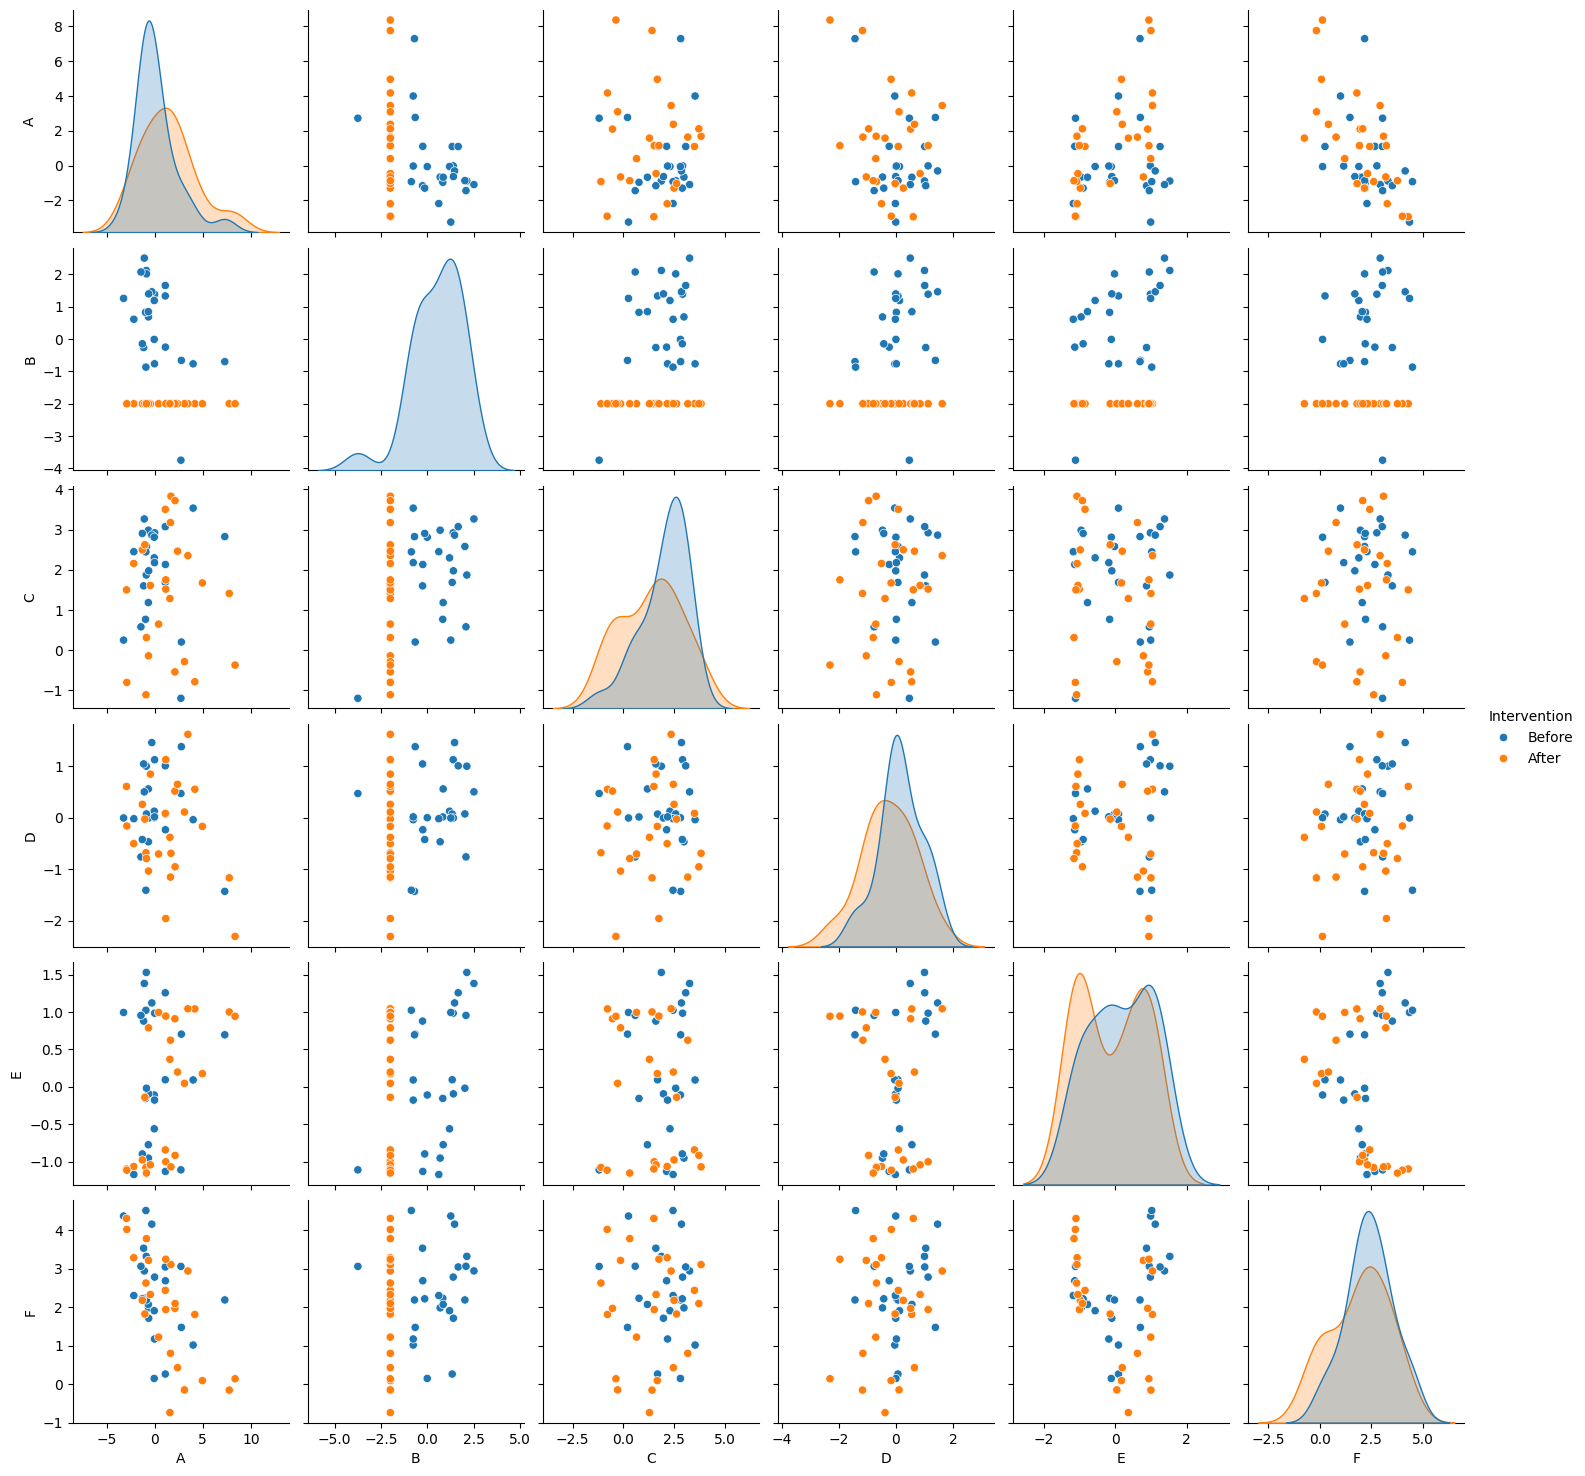

In [28]:
# Select the first 10 rows from each dataset
data_first10 = combined_data.head(25)
intervention5_data_first10 = intervention5_data.head(25)

# Create a column to indicate the source of the data ("Before" or "After")
data_first10["Intervention"] = "Before"
intervention5_data_first10["Intervention"] = "After"

# Combine the data into a single DataFrame
pairplot_data = pd.concat([data_first10, intervention5_data_first10])

# Create a pairplot with 'Intervention' as the hue to distinguish the two datasets
sns.pairplot(pairplot_data, hue="Intervention")

# Display the pairplot
plt.show()

In [29]:
from scipy import stats
import pandas as pd

# Assuming data is the original dataset and intervention1_data is the dataset after the intervention

# List of variables to test
variables = ['A', 'C', 'D', 'E', 'F']

# Significance level
alpha = 0.05

for var in variables:
    # Extract the specific variable to test
    before_intervention = combined_data.head(25)[var]
    after_intervention = intervention5_data[var]

    # Perform a paired samples t-test
    t_stat, p_value_t = stats.ttest_rel(before_intervention, after_intervention)

    # Calculate the variances for the F-test
    var_before = before_intervention.var()
    var_after = after_intervention.var()

    # Perform an F-test to compare variances
    f_stat = var_before / var_after
    df1 = len(before_intervention) - 1  # degrees of freedom for the first group
    df2 = len(after_intervention) - 1  # degrees of freedom for the second group

    # Calculate the p-value for the F-test
    p_value_f = stats.f.cdf(f_stat, df1, df2)

    # Only print results if there is a significant difference
    if p_value_t < alpha or p_value_f < alpha:
        print(f"Variable: {var}")

        # Check for significant difference in means
        if p_value_t < alpha:
            print("Paired t-test:")
            print("  T-statistic:", t_stat)
            print("  P-value:", p_value_t)
            print("  Reject the null hypothesis - significant difference in means.")

        # Check for significant difference in variances
        if p_value_f < alpha:
            print("F-test for variances:")
            print("  F-statistic:", f_stat)
            print("  P-value:", p_value_f)
            print("  Reject the null hypothesis - significant difference in variances.")

        print("\n")  # Add a newline for better readability between tests

## Intervention: E = -2

In [30]:
# Load the data from the provided CSV file
intervention6_data_path = "/Users/nicolaigarderhansen/Downloads/data_1447.csv"

intervention6_data = pd.read_csv(intervention6_data_path)

intervention6_data = intervention6_data.drop(intervention6_data.columns[0], axis=1)

intervention6_data.head(25)

,A,B,C,D,E,F
0,-5.399879,1.060631,1.880840,-0.410777,-2.0,6.389405
1,-4.777303,-1.666371,-1.649907,-0.479611,-2.0,6.888768
2,-1.418434,-0.798966,0.366049,-1.471040,-2.0,4.621189
3,-6.528860,2.327188,2.781112,-0.497762,-2.0,7.901681
4,1.665471,0.331866,-0.164508,-0.733066,-2.0,7.066191
5,-2.574727,1.564293,2.483137,-1.673848,-2.0,6.289169
6,1.776423,-0.850748,3.748526,0.021039,-2.0,7.454343
7,-7.443501,3.102203,2.712866,0.202705,-2.0,8.138059
8,-4.699503,2.462118,-2.009171,-1.885270,-2.0,9.250574
9,-5.402035,0.190218,0.876846,-0.229666,-2.0,7.532667


In [31]:
# List of target variables
target_variables = ["A", "B", "C", "D", "E", "F"]

# Calculate means for before intervention
before_intervention_means = combined_data[target_variables].mean()

# Calculate means for after intervention
after_intervention_means = intervention6_data[target_variables].mean()

# Calculate the difference in means
mean_differences = after_intervention_means - before_intervention_means

# Display the difference in means
print("\nDifference in Means:")
print(mean_differences)


Difference in Means:
A   -4.241363
B    1.388078
C   -0.360008
D   -0.445656
E   -1.995218
F    4.739011
dtype: float64


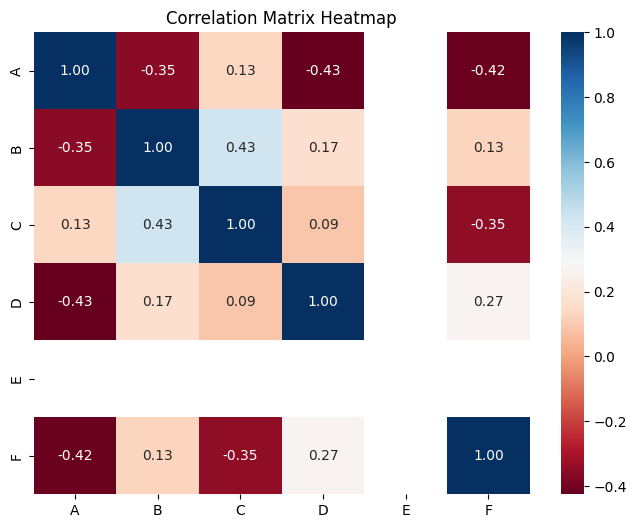

In [32]:
# Calculate the correlation matrix for the data to find potential relationships
correlation_matrix6 = intervention6_data.corr() 

# Plot
plt.figure(figsize=(8, 6))
correlation_plot4 = sns.heatmap(correlation_matrix6, annot=True, cmap='RdBu', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

/var/folders/rg/5qwcvj1934v3254xfppzsxm80000gn/T/ipykernel_62285/1041593932.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_first10["Intervention"] = "Before"
/var/folders/rg/5qwcvj1934v3254xfppzsxm80000gn/T/ipykernel_62285/1041593932.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intervention6_data_first10["Intervention"] = "After"


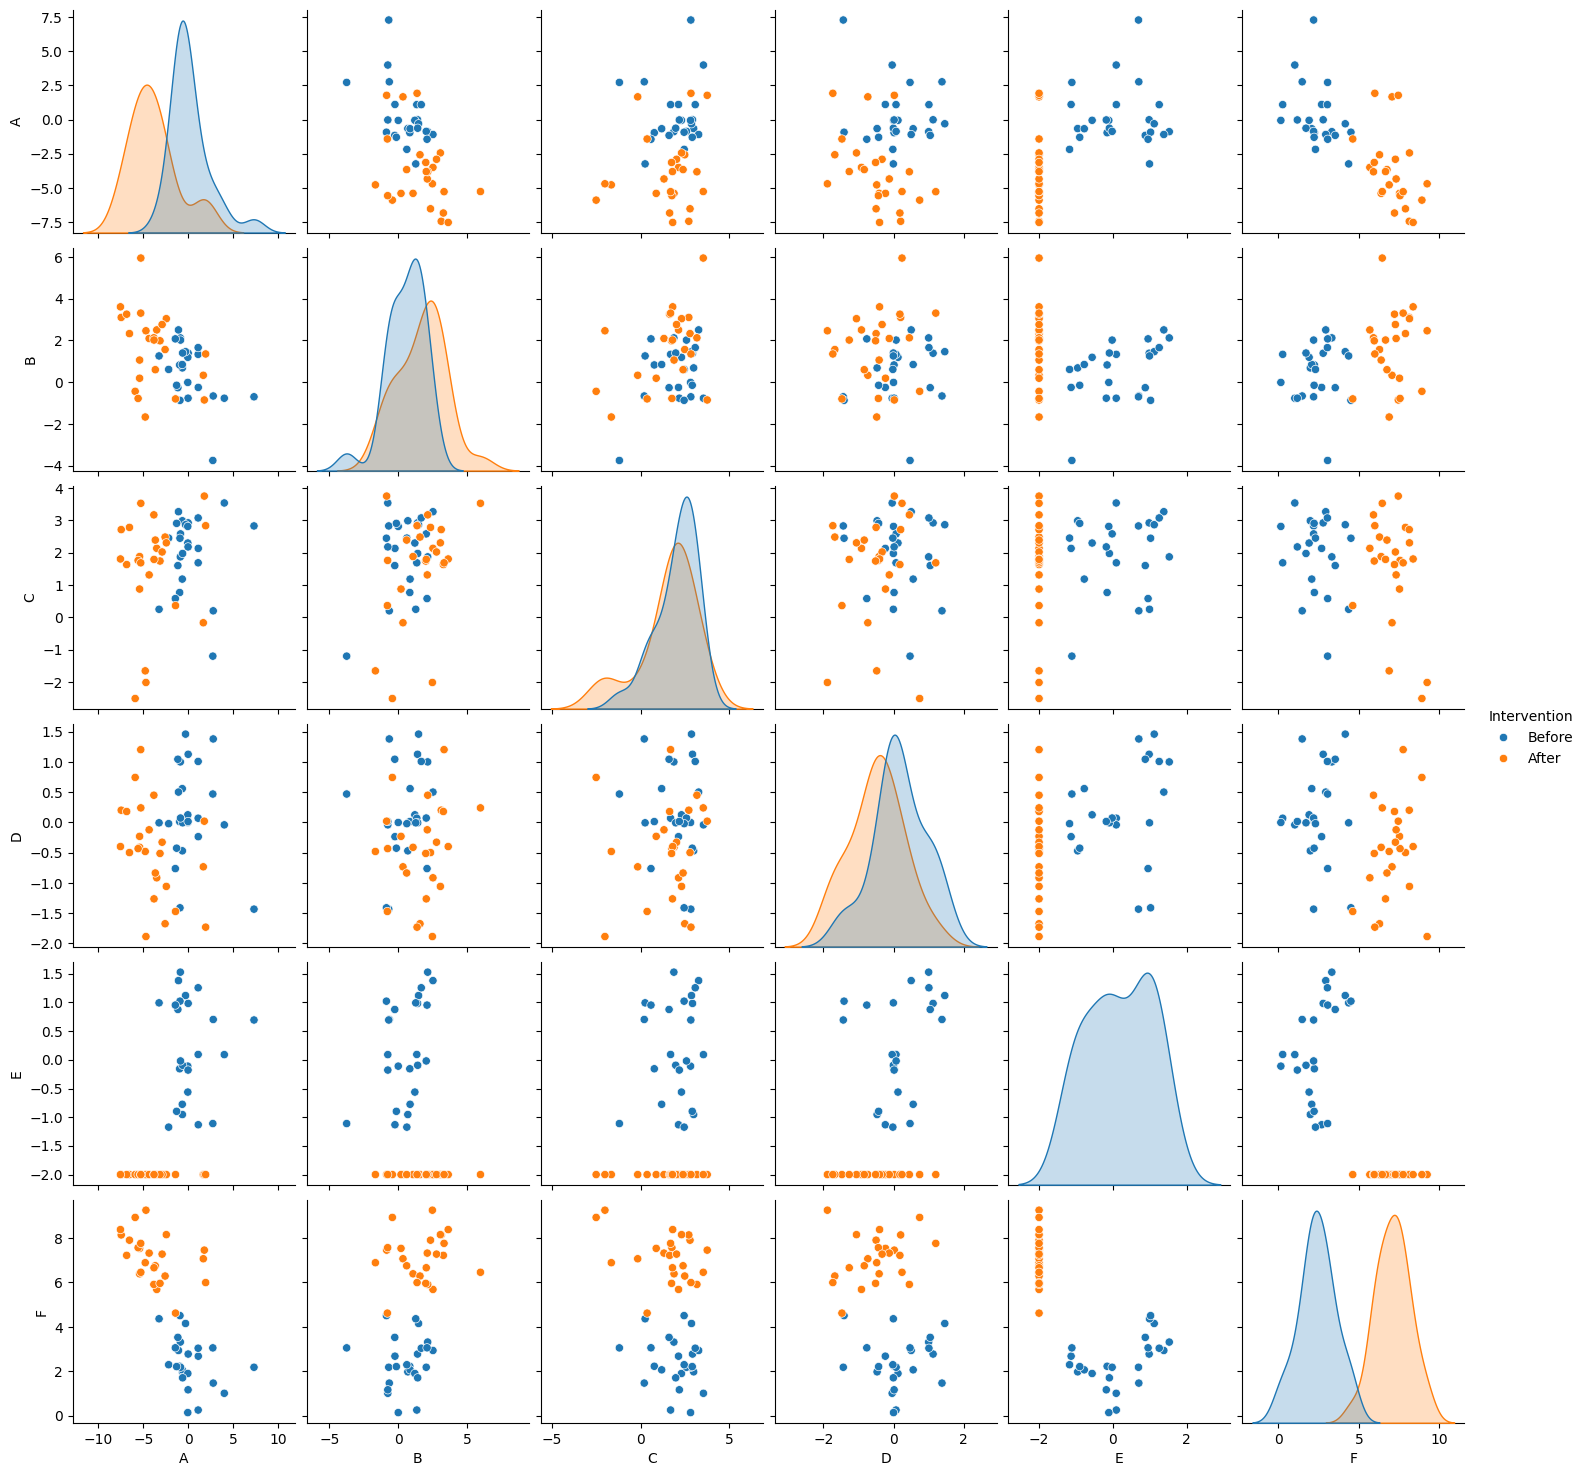

In [33]:
# Select the first 10 rows from each dataset
data_first10 = combined_data.head(25)
intervention6_data_first10 = intervention6_data.head(25)

# Create a column to indicate the source of the data ("Before" or "After")
data_first10["Intervention"] = "Before"
intervention6_data_first10["Intervention"] = "After"

# Combine the data into a single DataFrame
pairplot_data = pd.concat([data_first10, intervention6_data_first10])

# Create a pairplot with 'Intervention' as the hue to distinguish the two datasets
sns.pairplot(pairplot_data, hue="Intervention")

# Display the pairplot
plt.show()

In [34]:
from scipy import stats
import pandas as pd

# Assuming data is the original dataset and intervention1_data is the dataset after the intervention

# List of variables to test
variables = ['A', 'B', 'C', 'D', 'F']

# Significance level
alpha = 0.05

for var in variables:
    # Extract the specific variable to test
    before_intervention = combined_data.head(25)[var]
    after_intervention = intervention6_data[var]

    # Perform a paired samples t-test
    t_stat, p_value_t = stats.ttest_rel(before_intervention, after_intervention)

    # Calculate the variances for the F-test
    var_before = before_intervention.var()
    var_after = after_intervention.var()

    # Perform an F-test to compare variances
    f_stat = var_before / var_after
    df1 = len(before_intervention) - 1  # degrees of freedom for the first group
    df2 = len(after_intervention) - 1  # degrees of freedom for the second group

    # Calculate the p-value for the F-test
    p_value_f = stats.f.cdf(f_stat, df1, df2)

    # Only print results if there is a significant difference
    if p_value_t < alpha or p_value_f < alpha:
        print(f"Variable: {var}")

        # Check for significant difference in means
        if p_value_t < alpha:
            print("Paired t-test:")
            print("  T-statistic:", t_stat)
            print("  P-value:", p_value_t)
            print("  Reject the null hypothesis - significant difference in means.")

        # Check for significant difference in variances
        if p_value_f < alpha:
            print("F-test for variances:")
            print("  F-statistic:", f_stat)
            print("  P-value:", p_value_f)
            print("  Reject the null hypothesis - significant difference in variances.")

        print("\n")  # Add a newline for better readability between tests

Variable: A
Paired t-test:
  T-statistic: 7.225073289165641
  P-value: 1.8239870313587052e-07
  Reject the null hypothesis - significant difference in means.


Variable: B
Paired t-test:
  T-statistic: -2.817082121519973
  P-value: 0.009542548369082304
  Reject the null hypothesis - significant difference in means.


Variable: C
F-test for variances:
  F-statistic: 0.5018304863248725
  P-value: 0.0489161338917307
  Reject the null hypothesis - significant difference in variances.


Variable: D
Paired t-test:
  T-statistic: 2.777349017510558
  P-value: 0.010464762235438034
  Reject the null hypothesis - significant difference in means.


Variable: F
Paired t-test:
  T-statistic: -16.41357192162959
  P-value: 1.504128274095997e-14
  Reject the null hypothesis - significant difference in means.


